In [41]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out Altair FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
#Load national data from SSA
national_df = pd.read_csv("Data/national_data.csv")
#Load state data from SSA
states_df = pd.read_csv("Data/states_data.csv")
#Load character/actor names
movies_df = pd.read_csv("Data/cleaned_cast_and_characters.csv")

In [43]:
# Convert the column to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the year
movies_df['release_date'] = movies_df['release_date'].dt.year

# Fill missing values with 0
movies_df['release_date'].fillna(0, inplace=True)

# Convert column to int
movies_df['release_date'] = movies_df['release_date'].astype(int)

movies_df.head()

,title,release_date,actor_first_name,genders,character_first_name
0,Toy Story,1995,Tom,M,NaN
1,Toy Story,1995,Tim,M,NaN
2,Toy Story,1995,Don,M,NaN
3,Toy Story,1995,Jim,M,NaN
4,Toy Story,1995,Wallace,M,NaN


In [44]:
# Get the top 500 actor_first_names
top_500_actors = movies_df['actor_first_name'].value_counts().nlargest(500).index

# Filter to include only rows where actor_first_name is in the top 500
top_500_actors_df = movies_df[movies_df['actor_first_name'].isin(top_500_actors)]

top_500_actors_df

,title,release_date,actor_first_name,genders,character_first_name
0,Toy Story,1995,Tom,M,NaN
1,Toy Story,1995,Tim,M,NaN
2,Toy Story,1995,Don,M,NaN
3,Toy Story,1995,Jim,M,NaN
4,Toy Story,1995,Wallace,M,NaN
...,...,...,...,...,...
421505,Betrayal,2003,Jason,unknown,Boyd
421506,Betrayal,2003,Joe,M,Sammy
421508,Betrayal,2003,Don,M,Fred
421509,Betrayal,2003,Peter,M,NaN


In [61]:
# Get top 10 actor_first_names
top_10_actors = movies_df['actor_first_name'].value_counts().nlargest(10).index

# Filter to include only rows where actor_first_name is in the top 10
top_10_actors_df = movies_df[movies_df['actor_first_name'].isin(top_10_actors)]

# Group by 'release_date' and 'actor_first_name' and count the number of occurrences
counts_per_year = top_10_actors_df.groupby(['release_date', 'actor_first_name']).size().reset_index(name='count')

# Filter zero values
counts_per_year_filtered = counts_per_year[counts_per_year['release_date'] != 0]


counts_per_year_filtered

,release_date,actor_first_name,count
8,1892,William,2
9,1894,William,1
10,1896,John,1
11,1903,George,1
12,1903,James,1
...,...,...,...
1017,2018,Michael,1
1018,2018,Paul,2
1019,2018,Peter,2
1020,2018,Richard,1


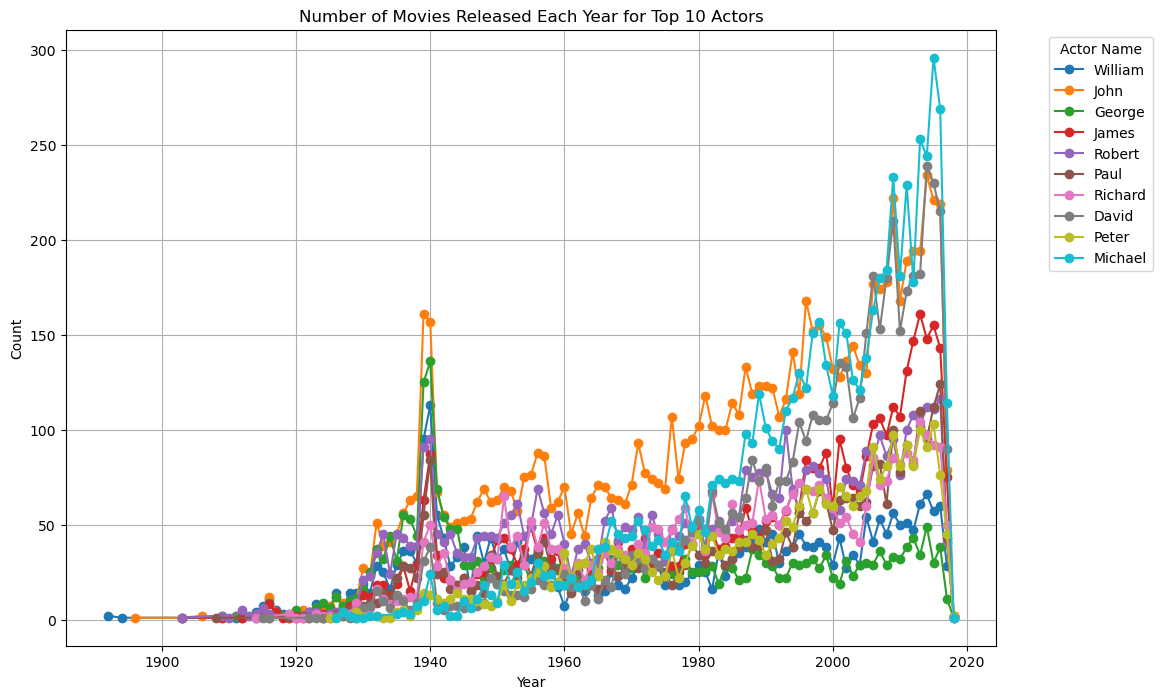

In [65]:
plt.figure(figsize=(12, 8))
for actor_name in counts_per_year_filtered['actor_first_name'].unique():
    actor_data = counts_per_year_filtered[counts_per_year_filtered['actor_first_name'] == actor_name]
    plt.plot(actor_data['release_date'], actor_data['count'], marker='o', label=actor_name)

plt.title('Number of Movies Released Each Year for Top 10 Actors')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Actor Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [9]:
# Get the top 500 character_first_names
top_500_characters = movies_df['character_first_name'].value_counts().nlargest(500).index
# Filter movies_df to include only rows where character_first_name is in the top 500
top_500_characters_df = movies_df[movies_df['character_first_name'].isin(top_500_characters)]

In [10]:
national_df.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
